# 1-5 Pandas DataFrame 資料處理

# 安裝 pandas
若有語法不了解的地方，可以參考以下連結:
- [API reference](https://pandas.pydata.org/docs/reference/index.html)
- [Pandas Tutorial](https://www.w3schools.com/python/pandas/default.asp)
- [Pandas 教程](https://www.runoob.com/pandas/pandas-tutorial.html)

In [1]:
# 安裝套件
# !pip install pandas
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
path = r"C:\Users\xdxd2\Sunny_VS_worksapce\Sunny_python\數據分析教材\sunny_ispan_data_analysis\kaggle\titanic\extracted_data"

In [9]:
df = pd.read_csv(path + "/train.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## NA 值確認

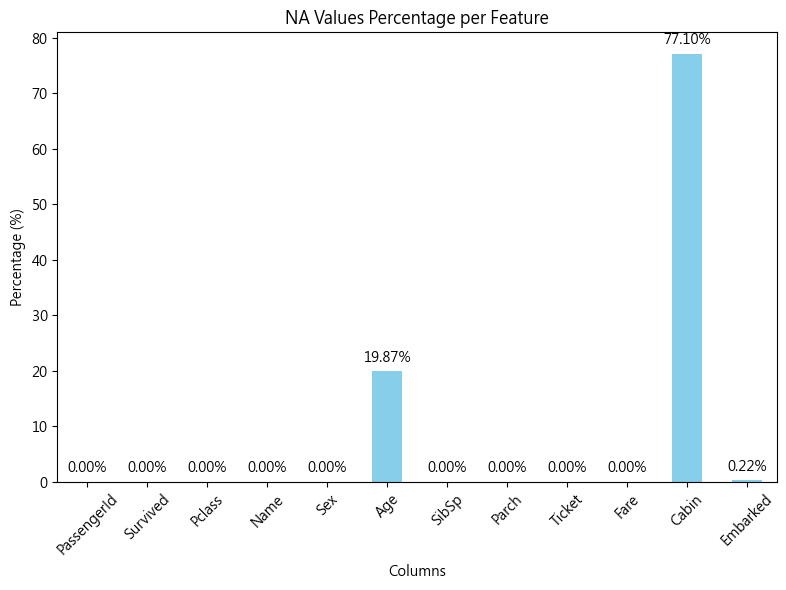

In [19]:
na_percentage = df.isna().mean() * 100

plt.figure(figsize=(8, 6))
ax = na_percentage.plot(kind='bar', color='skyblue')
plt.title('NA Values Percentage per Feature')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

for i, v in enumerate(na_percentage):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

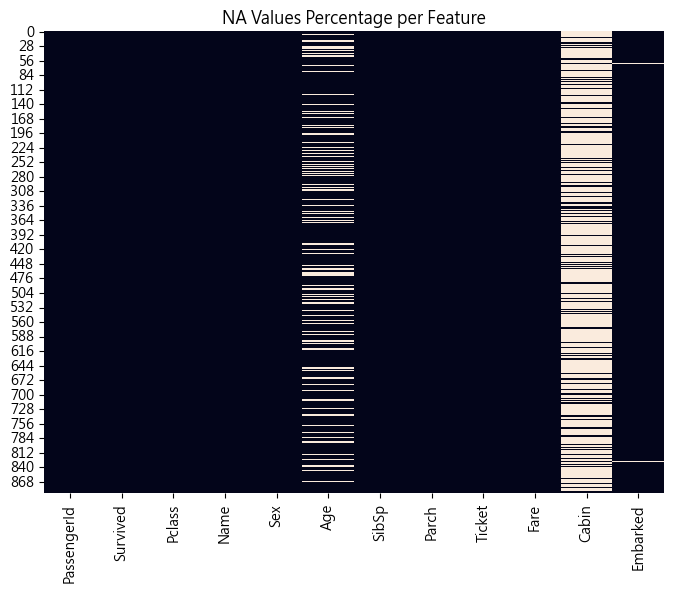

In [26]:
def plot_missing_distribution(df, title):
    fig, ax = plt.subplots(figsize=(8,6))
    plt.title(title)
    sns.heatmap(df.isnull(), cbar=False)


plot_missing_distribution(df, "NA Values Percentage per Feature")

## 訓練集的預測項目比例

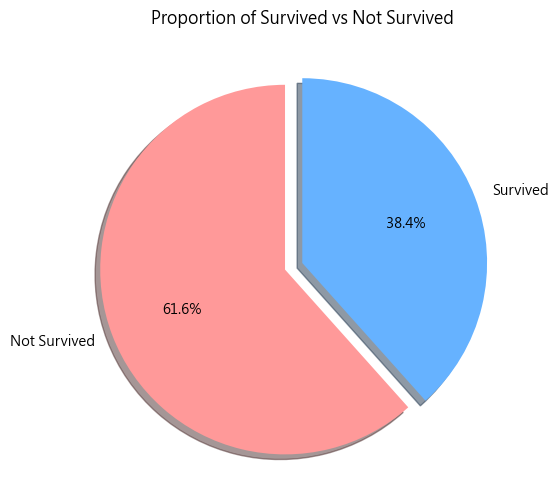

In [66]:
# 圓餅圖應用
# Count the occurrences of 0 and 1 in the 'Survived' column
survived_counts = df['Survived'].value_counts()

# Plotting the pie chart
labels = ['Not Survived', 'Survived']
colors = ['#ff9999','#66b2ff']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8,6))
plt.pie(survived_counts, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Proportion of Survived vs Not Survived")
plt.show()

In [28]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## 資料對比探索
類別型資料比較 (長條圖, 堆疊長條圖, 群組直條圖)

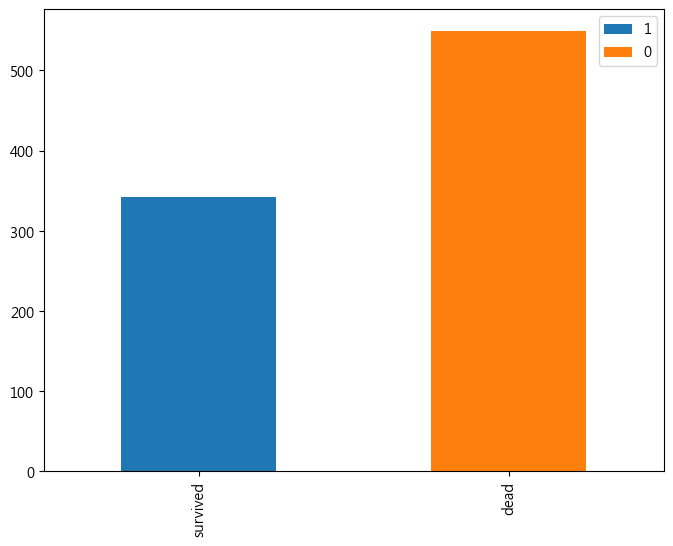

In [72]:
def bar_chart_stacked(df, feature, stacked=True):
    survived = df[df["Survived"] == 1][feature].value_counts()
    dead = df[df["Survived"] == 0][feature].value_counts()

    df_survived_dead = pd.DataFrame([survived, dead])
    df_survived_dead.index = ["survived", "dead"]
    ax = df_survived_dead.plot(kind="bar", stacked=stacked, figsize=(8,6))

bar_chart_stacked(df, "Survived")


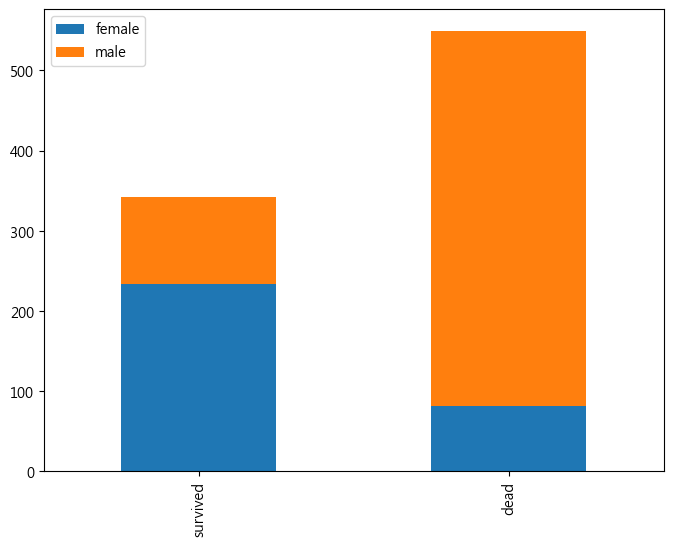

In [71]:
bar_chart_stacked(df, "Sex")

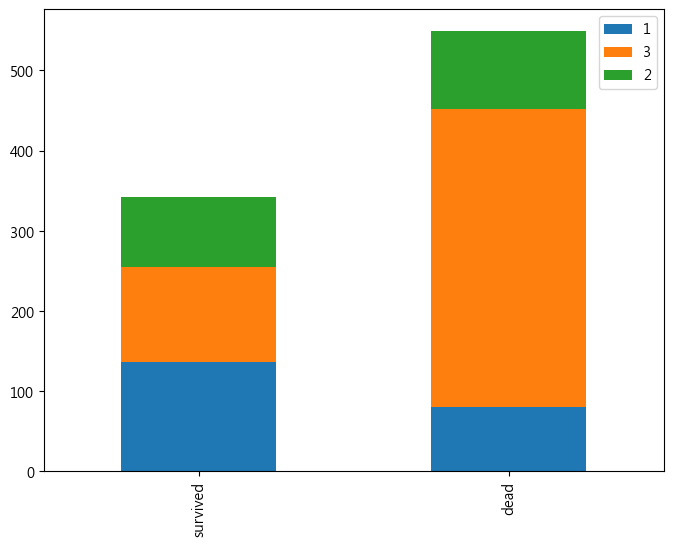

In [73]:
bar_chart_stacked(df, "Pclass")

In [78]:
def bar_chart_survived_compare_by(df, feature1, feature2=None):
    plt.figure(figsize=(8,6))
    plt.title(f"survived rate by {feature1} and {feature2}")
    g = sns.barplot(x=feature1, y="Survived", hue=feature2, ci=None, data=df).set_ylabel("survived rate")

C:\Users\xdxd2\AppData\Local\Temp\ipykernel_5796\586584678.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x=feature1, y="Survived", hue=feature2, ci=None, data=df).set_ylabel("survived rate")


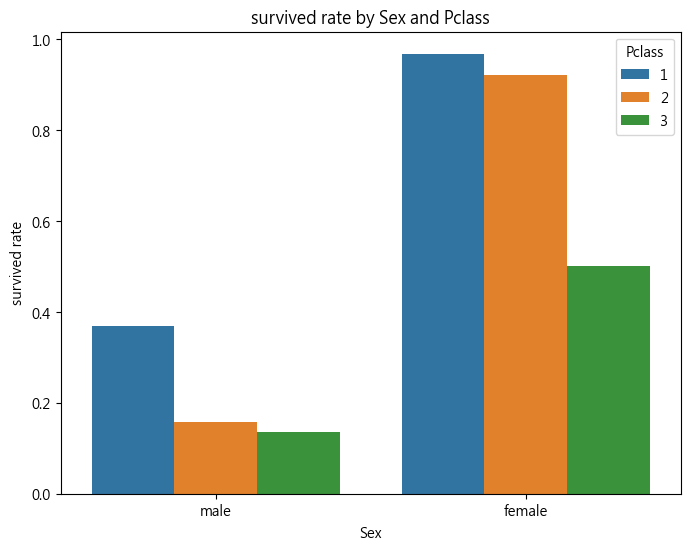

In [79]:
bar_chart_survived_compare_by(df, "Sex", "Pclass")

## 資料分佈探索

In [92]:
def plot_distribution(df, feature, title, bins=30, fsize=(8,6)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.distplot(df[feature], color="g", bins = bins, ax=ax)

C:\Users\xdxd2\AppData\Local\Temp\ipykernel_5796\2729459750.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], color="g", bins = bins, ax=ax)


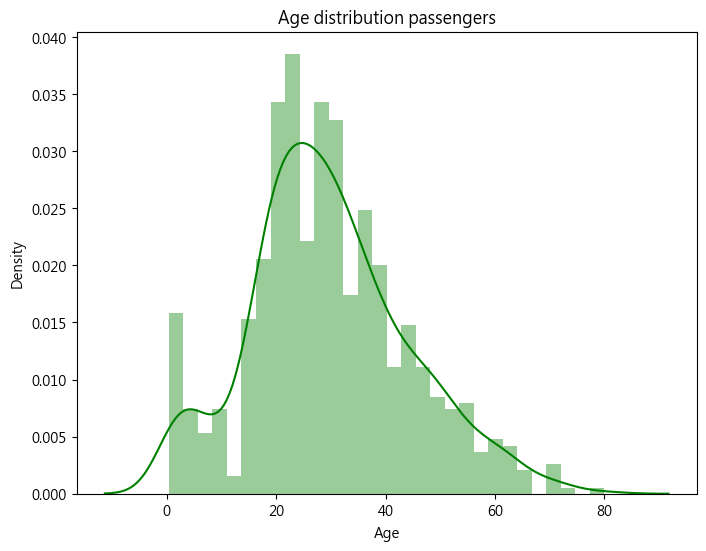

In [93]:
plot_distribution(df, "Age", "Age distribution passengers")

## KDE疊圖區分差異

In [111]:
def plot_kernal_density_estimate_survivors(df, feature, title, fsize=(8, 6)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.kdeplot(df[feature].loc[df["Survived"] == 1], fill=True, ax=ax, label="Survived")
    sns.kdeplot(df[feature].loc[df["Survived"] == 0], fill=True, ax=ax, label="Died")
    
    # 添加圖例
    ax.legend()

    # 設置x軸標籤
    ax.set_xlabel(feature)

    # 設置y軸標籤
    ax.set_ylabel("Density")

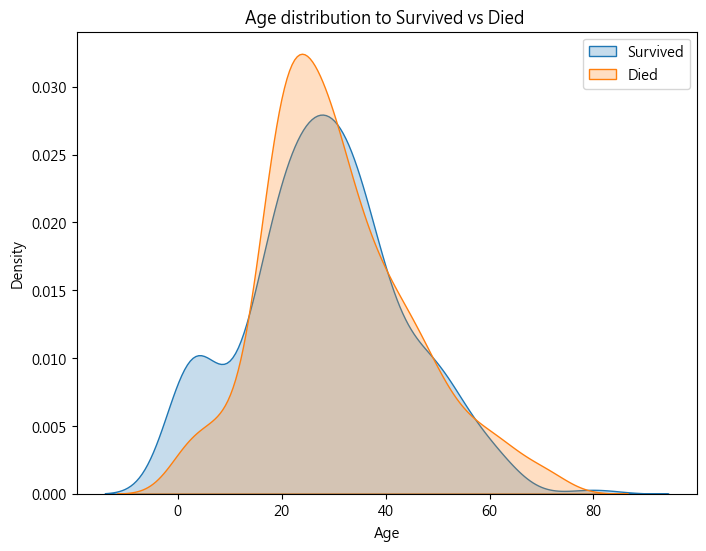

In [112]:
plot_kernal_density_estimate_survivors(df, "Age", "Age distribution to Survived vs Died ")

## 雙變量分佈觀察技巧

In [123]:
def plot_swarm_survivors(df, feature1, feature2, title, fsize=(155)):
    fig, ax = plt.subplots(figsize=(18,5))
    ax.grid(True)
    # plt.xticks(list(range(0,100,2)))
    ax.set_title(title)
    sns.swarmplot(df, y=feature1, x=feature2, hue="Survived")

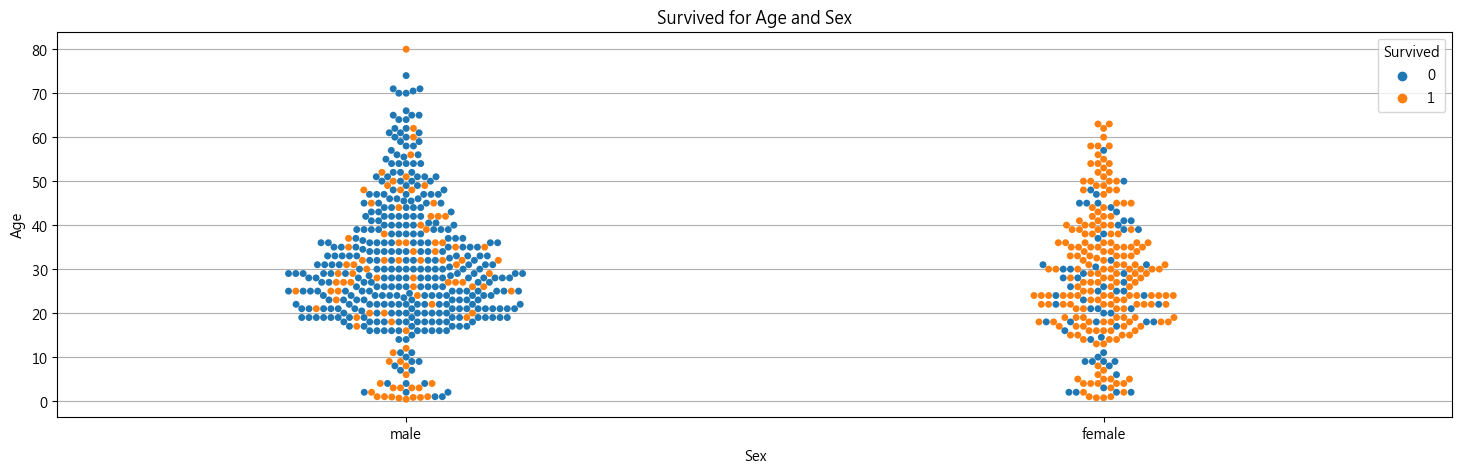

In [134]:
plot_swarm_survivors(df, "Age", "Sex", "Survived for Age and Sex")

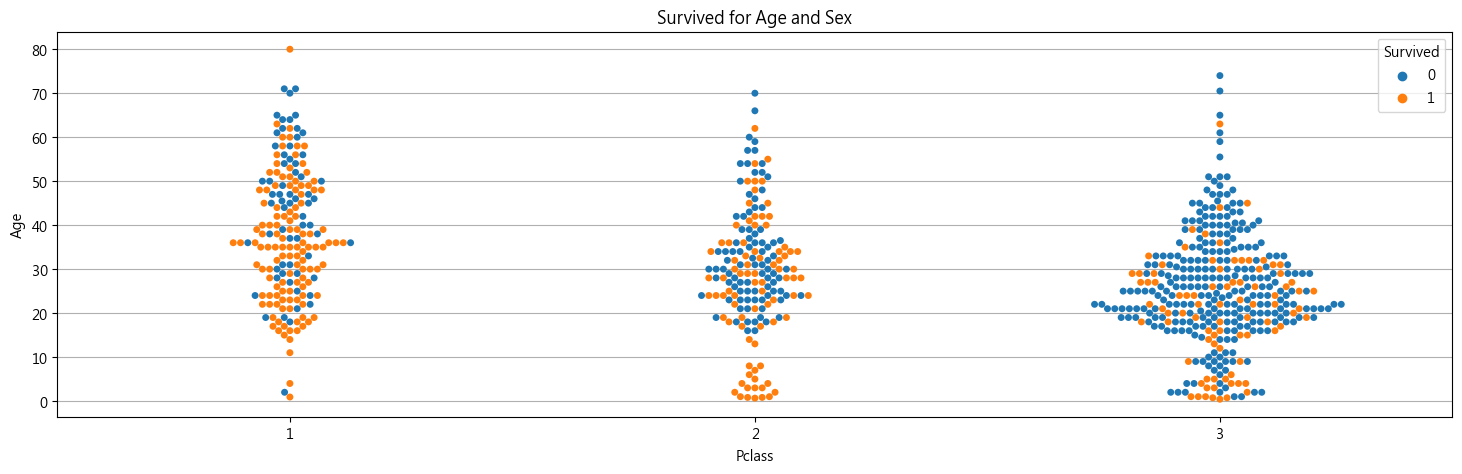

In [133]:
plot_swarm_survivors(df, "Age", "Pclass", "Survived for Age and Sex")

## 連續型資料分筒技巧

In [129]:
def plot_quartitles(df, feature, title, categories):
    fig, ax = plt.subplots(figsize=(10,6))
    fare_ranges = pd.qcut(df[feature], len(categories), labels=categories) # 0, 0.25, 0.5, 0.75, 1
    ax.set_title(title)
    sns.barplot(y = df["Survived"], x=fare_ranges, ax=ax)

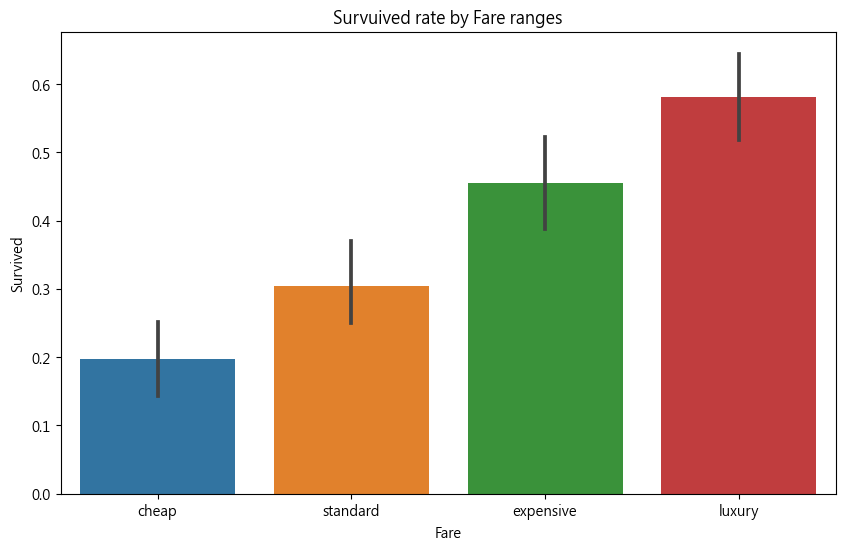

In [130]:
categories = ["cheap", "standard", "expensive", "luxury"]
plot_quartitles(df, "Fare", "Survuived rate by Fare ranges", categories)